In [68]:
import json
import matplotlib.pyplot as plt
import datetime
import numpy as np

with open("fundings.json", "r") as file:
    fundings = json.load(file)

In [69]:
fundings

{'BNB': {'code': 200,
  'resolution': '1h',
  'fundings': [{'timestamp': 1746421200,
    'value': '0.0071',
    'rate': '0.0012',
    'direction': 'long'},
   {'timestamp': 1746424800,
    'value': '0.0071',
    'rate': '0.0012',
    'direction': 'long'},
   {'timestamp': 1746428400,
    'value': '0.0071',
    'rate': '0.0012',
    'direction': 'long'},
   {'timestamp': 1746432000,
    'value': '0.0071',
    'rate': '0.0012',
    'direction': 'long'},
   {'timestamp': 1746435600,
    'value': '0.0071',
    'rate': '0.0012',
    'direction': 'long'},
   {'timestamp': 1746439200,
    'value': '0.0071',
    'rate': '0.0012',
    'direction': 'long'},
   {'timestamp': 1746442800,
    'value': '0.0071',
    'rate': '0.0012',
    'direction': 'long'},
   {'timestamp': 1746446400,
    'value': '0.0071',
    'rate': '0.0012',
    'direction': 'long'},
   {'timestamp': 1746450000,
    'value': '0.0072',
    'rate': '0.0012',
    'direction': 'long'},
   {'timestamp': 1746453600,
    'value': '0

In [70]:
def plot_funding(ticker: str, start_date: str, end_date: str):
    """
    Plot funding rates for a ticker between start_date and end_date.

    Args:
        ticker (str): The symbol (e.g., "BTCUSDT").
        start_date (str): Start date in format "YYYY-MM-DD HH:MM".
        end_date (str): End date in format "YYYY-MM-DD HH:MM".
    """
    # Parse input date strings to datetime objects
    start_dt = datetime.datetime.strptime(start_date, "%Y-%m-%d %H:%M")
    end_dt = datetime.datetime.strptime(end_date, "%Y-%m-%d %H:%M")

    # Extract and filter fundings
    fund_data = fundings[ticker]['fundings']
    filtered = [
        x for x in fund_data
        if start_dt <= datetime.datetime.fromtimestamp(x['timestamp']) <= end_dt
    ]

    if not filtered:
        print("No data found in the given time range.")
        return

    # Prepare values and timestamps
    values = [-1*float(x['rate']) if x['direction'] == 'short' else float(x['rate']) for x in filtered]
    times = [datetime.datetime.fromtimestamp(x['timestamp']) for x in filtered]
    time_labels = [t.strftime("%-d %b %H:%M") for t in times]  # On Windows, use %#d

    x = np.arange(len(values))
    colors = ['green' if v > 0 else 'red' if v < 0 else 'gray' for v in values]

    # Plot
    plt.figure(figsize=(14, 6), dpi=150)
    plt.bar(x, values, color=colors, alpha=0.5)
    plt.xlabel("Time")
    plt.ylabel("Funding Rate")
    plt.xticks(x, time_labels, rotation=45, ha='right', fontsize=8)
    plt.grid(False)
    plt.box(True)
    plt.tight_layout()
    plt.show()

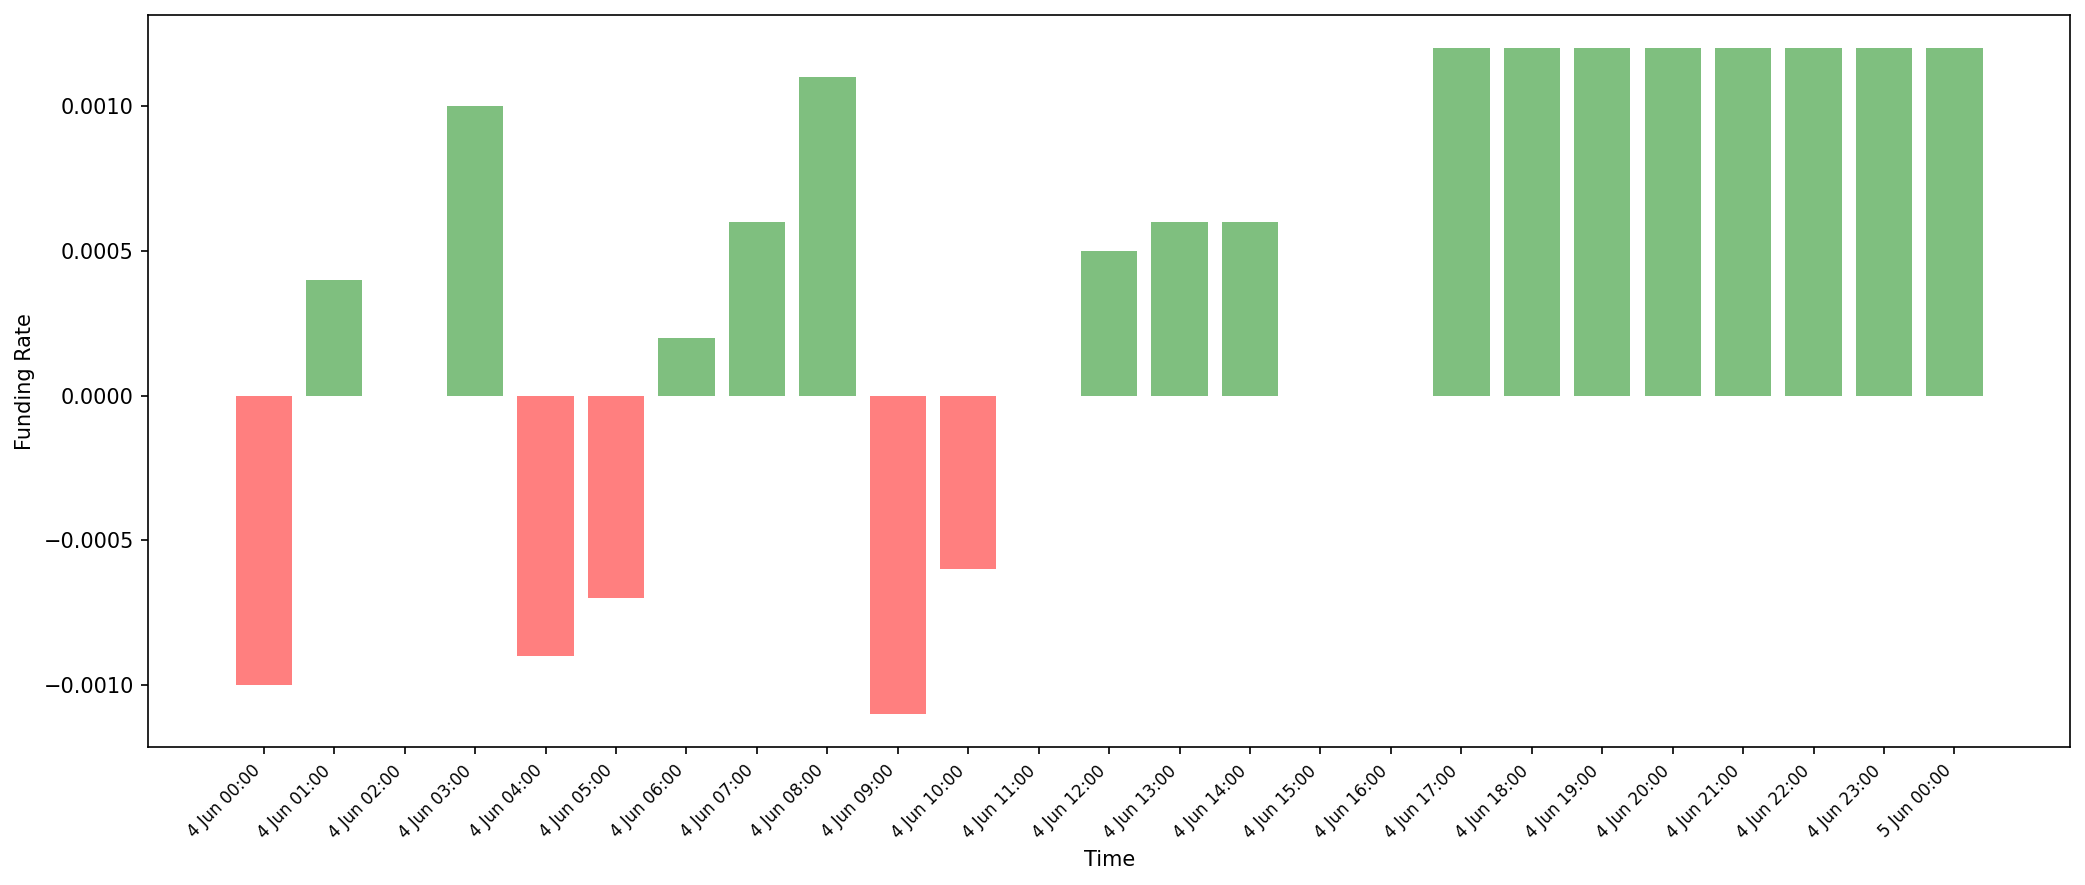

In [71]:
# the form of start_date and end_date -> "2025-05-01 00:00" -> %Y-%m-%d
plot_funding(ticker='BTC', start_date="2025-06-04 00:00", end_date="2025-06-05 00:00")